In [2]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt

# Sane outputs
pd.options.display.max_columns = 99
pd.set_option('max_colwidth', 200)
%matplotlib inline

# Read in data.
all_books = pd.read_csv("scifi_conceptNetwork_noIDF_201807.txt", delimiter="\t", encoding="latin1")

In [3]:
# Add "ai_present" column, only if the book 
# has "AI" in the concepts column.
def ai_present(x):
    if "AI" in x:
        return True
    return False

all_books['ai_present'] = all_books['concepts'].apply(lambda x: ai_present(x))

In [4]:
ai_books = all_books[all_books['ai_present'] == True]
not_ai_books = all_books[all_books['ai_present'] == False]

In [5]:
year_ai_list = []
for i in range(1858, 2018):
    num_ai_books = len(ai_books[ai_books['year'] == i])
    num_all_books = len(ai_books[ai_books['year'] == i]) + len(not_ai_books[not_ai_books['year'] == i]) 
    
    ai_books_num_reviews = ai_books[ai_books['year'] == i]['n_reviews'].sum()
    all_books_num_reviews = all_books[all_books['year'] == i]['n_reviews'].sum()
    
    num_reviews_prop = 0
    num_books_prop = 0

    # Avoid division by 0 issues
    if num_all_books !=0:
        num_books_prop = num_ai_books / num_all_books
    if all_books_num_reviews != 0:
        num_reviews_prop = ai_books_num_reviews / all_books_num_reviews
        
    year_ai_list.append([i, num_ai_books, num_all_books, num_books_prop, ai_books_num_reviews, all_books_num_reviews, num_reviews_prop])

year_df = pd.DataFrame(year_ai_list, columns=['year', 'num_ai_books', 'num_all_books', 'books_proportion', 'ai_reviews', 'all_reviews', 'reviews_proportion'])

In [6]:
post_1960 = year_df[(year_df['year'] > 1960)]
# post_1960.plot.bar(x='year', y='reviews_proportion', figsize=(20,8), cmap=cmap)

## Yearly Proportion of Books and Reviews AI Embodied

In [8]:
all_books[all_books['ai_present'] == True].head(20)[['title', 'url', 'ai_present']]

,title,url,ai_present
26,Tales of the Bounty Hunters (Star Wars Legends),http://www.goodreads.com/book/show/131776.Tales_of_the_Bounty_Hunters,True
29,The Dark Half,http://www.goodreads.com/book/show/11597.The_Dark_Half,True
40,Ancillary Mercy (Imperial Radch #3),http://www.goodreads.com/book/show/23533039-ancillary-mercy,True
62,Dune Messiah (Dune #2),http://www.goodreads.com/book/show/106.Dune_Messiah,True
64,Bolo (Bolo #1),http://www.goodreads.com/book/show/464042.Bolo,True
71,2061: Odyssey Three (Space Odyssey #3),http://www.goodreads.com/book/show/35816.2061,True
80,The State of the Art (Culture #4),http://www.goodreads.com/book/show/129131.The_State_of_the_Art,True
89,The Last Question,http://www.goodreads.com/book/show/4808763-the-last-question,True
93,Gridlinked (Agent Cormac #1),http://www.goodreads.com/book/show/98046.Gridlinked,True
97,The Invincible,http://www.goodreads.com/book/show/251633.The_Invincible,True


In [6]:
import matplotlib.cm as cm
cmap = cm.Spectral

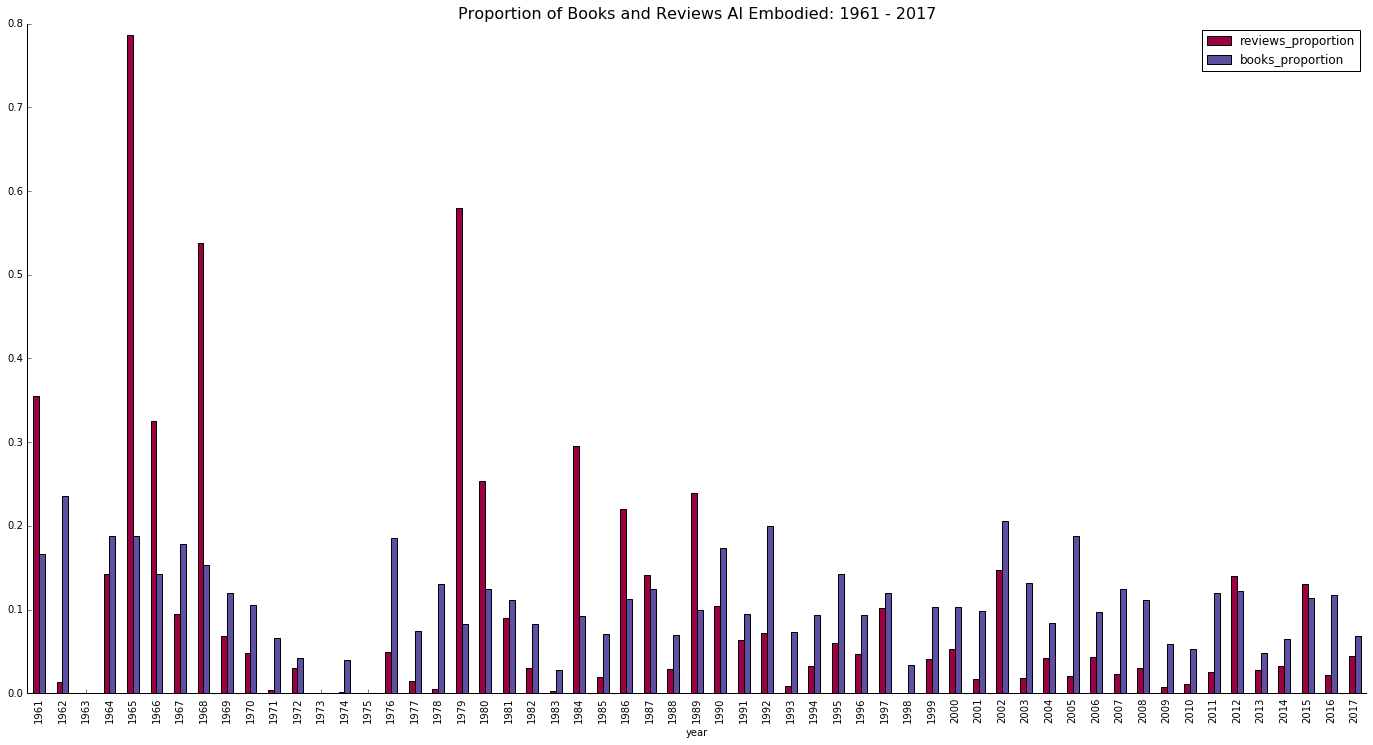

In [7]:
ax = post_1960[['year','reviews_proportion', 'books_proportion']].plot.bar(x='year', figsize=(24,12), cmap=cmap)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title("Proportion of Books and Reviews AI Embodied: 1961 - 2017", fontdict={'size': 16})
plt.savefig('scifi_book_proportions_61_2017.svg')

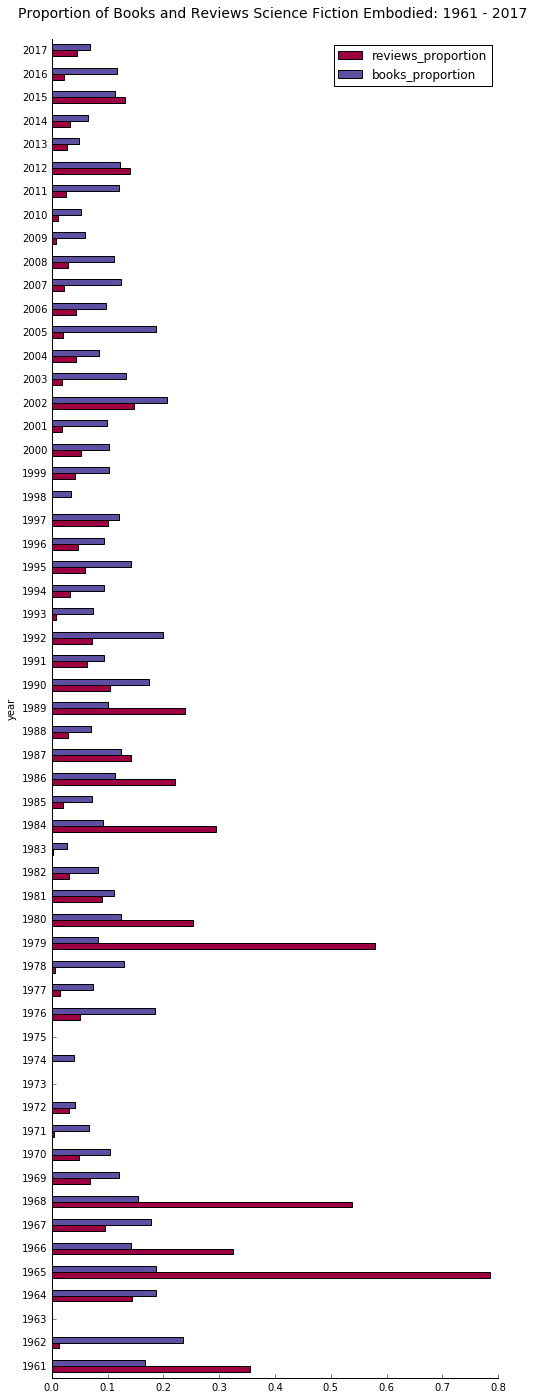

In [8]:
ax = post_1960[['year','reviews_proportion', 'books_proportion']].plot.barh(x='year', figsize=(8,24), cmap=cmap)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title("Proportion of Books and Reviews Science Fiction Embodied: 1961 - 2017 \n", fontdict={'size': 14})
plt.savefig('scifi_book_proportions_61_2017_horizontal.svg')

/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


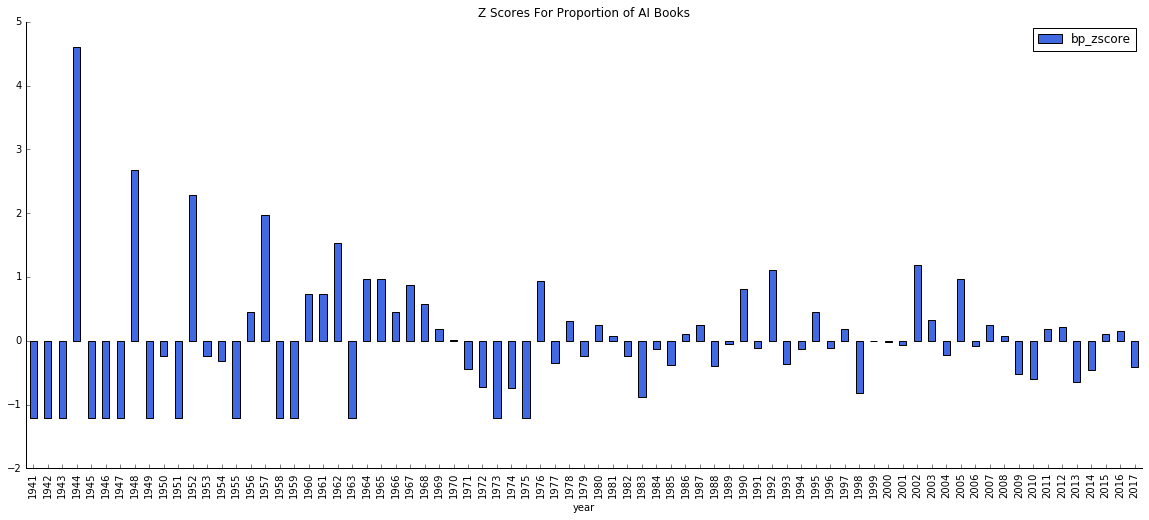

In [9]:
post_1940 = year_df[(year_df['year'] > 1940)]
post_1940['bp_zscore'] = (post_1940['books_proportion'] - post_1940['books_proportion'].mean())/(post_1940['books_proportion'].std())
ax3 = post_1940.plot.bar(x='year', y='bp_zscore', figsize=(20,8), color='royalblue', title='Z Scores For Proportion of AI Books')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')

plt.savefig('scifi_book_proportions_61_2017_zscores.svg')

## Plot Yearly Proportion of SciFi Books That Are Tagged As AI

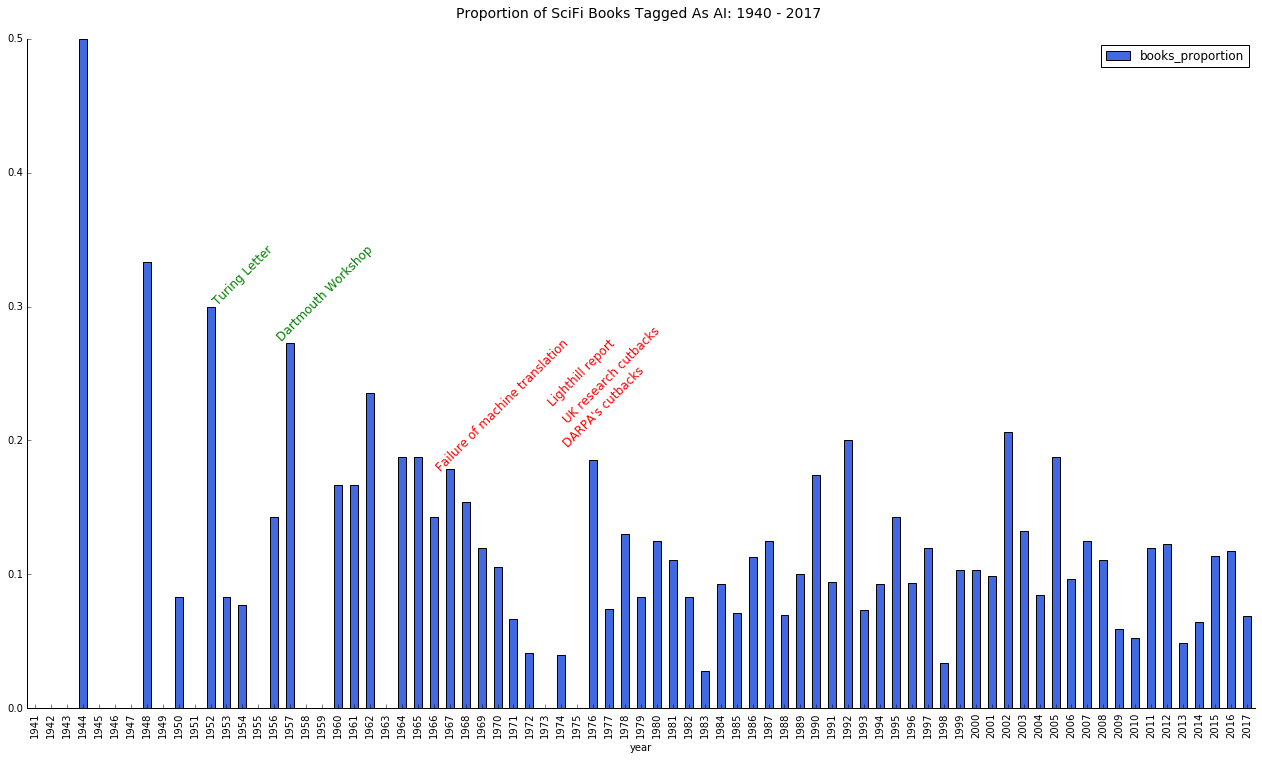

In [10]:
## Unfinished prototype, please don't judge the quality of text annotations!
ax = post_1940.plot.bar(x='year', y='books_proportion', figsize=(22,12), color='royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.text(1952-1941, 0.34, 'Turing Letter', rotation=45, fontdict={'size': 12}, color='green')
ax.text(1956-1941, 0.34, 'Dartmouth Workshop', rotation=45, fontdict={'size': 12}, color='green')
ax.text(1966-1941, 0.27, 'Failure of machine translation', rotation=45, fontdict={'size': 12}, color='red')
# ax.text(1970-1941, 0.27, 'Abandonment of connectionism', rotation=45, fontdict={'size': 12})
# ax.text(1971-1941, 0.27, "DARPA's frustration ", rotation=45, fontdict={'size': 12})
ax.text(1973-1941, 0.27, "Lighthill report", rotation=45, fontdict={'size': 12}, color='red')
ax.text(1974-1941, 0.28, "UK research cutbacks", rotation=45, fontdict={'size': 12}, color='red')
ax.text(1974-1941, 0.25, "DARPA's cutbacks", rotation=45, fontdict={'size': 12}, color='red')

ax.set_title("Proportion of SciFi Books Tagged As AI: 1940 - 2017 \n", fontdict={'size': 14})

## 5 Year Rolling Proportion of AI Books

In [11]:
year_df['rolling_avg_books_prop'] = year_df['num_ai_books'].rolling(5).sum() / year_df['num_all_books'].rolling(5).sum()

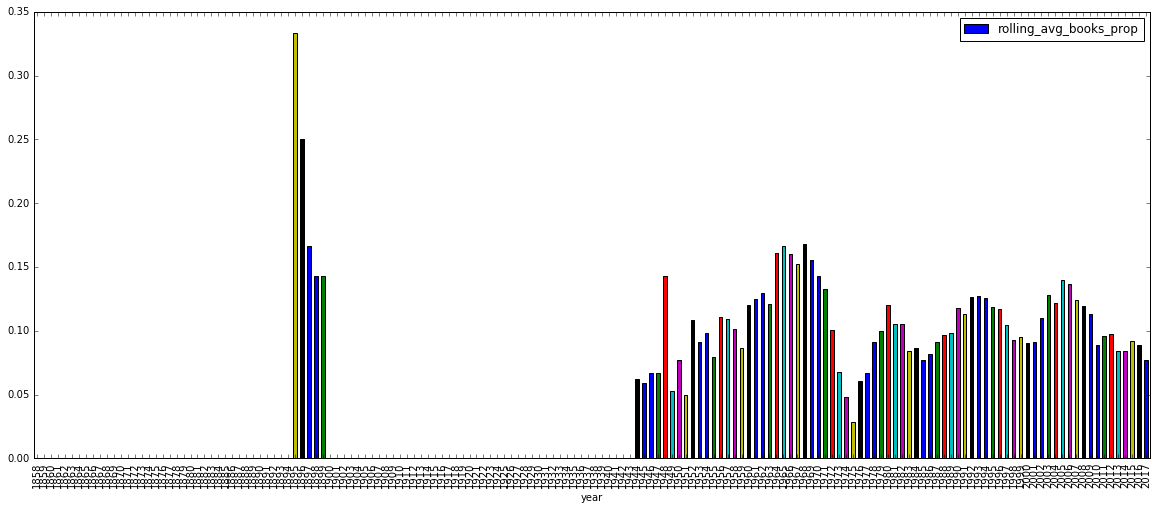

In [12]:
year_df.plot.bar(x='year', y='rolling_avg_books_prop', figsize=(20,8))

/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


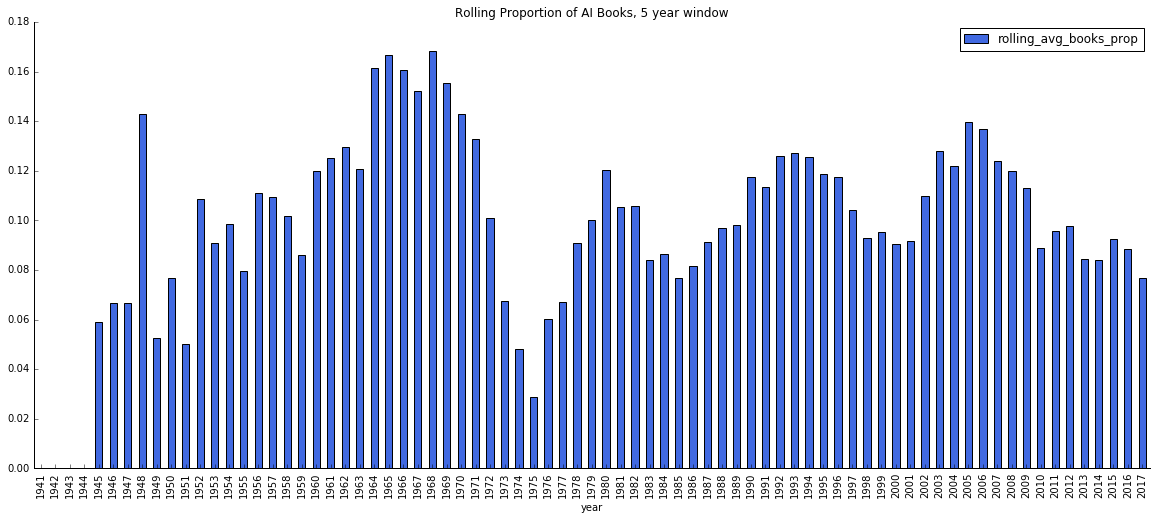

In [13]:
post_1940['rolling_avg_books_prop'] = post_1940['num_ai_books'].rolling(5).sum() / post_1940['num_all_books'].rolling(5).sum()
ax4 = post_1940.plot.bar(x='year', y='rolling_avg_books_prop', figsize=(20,8), color='royalblue', title='Rolling Proportion of AI Books, 5 year window')

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')

plt.savefig('scifi_book_proportions_61_2017_rolling.svg')

## Z-Scores With Resampling

In [14]:
import numpy as np

In [ ]:
all_books['ai_present']

In [54]:
def resample_zscore_proportion(x):
    bin_books = x['num_all_books']
    bin_ai_proportion = x['books_proportion']
    
    sample_proportions = []
    
    for i in range(0, 100):
        sample_n_books = all_books.sample(bin_books)
        sample_ai_count = sample_n_books['ai_present'].sum()
        sample_ai_proportion = sample_ai_count / bin_books
        sample_proportions.append(sample_ai_proportion)
    
    mean = np.array(sample_proportions).mean()
    stdev = np.std(np.array(sample_proportions))
    
    zscore = (bin_ai_proportion - mean) / (stdev)
    return(zscore)

year_df['sampled_zscore'] = year_df.apply(lambda x: resample_zscore_proportion(x), axis=1)

/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/pandas/core/generic.py:3441: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)
/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


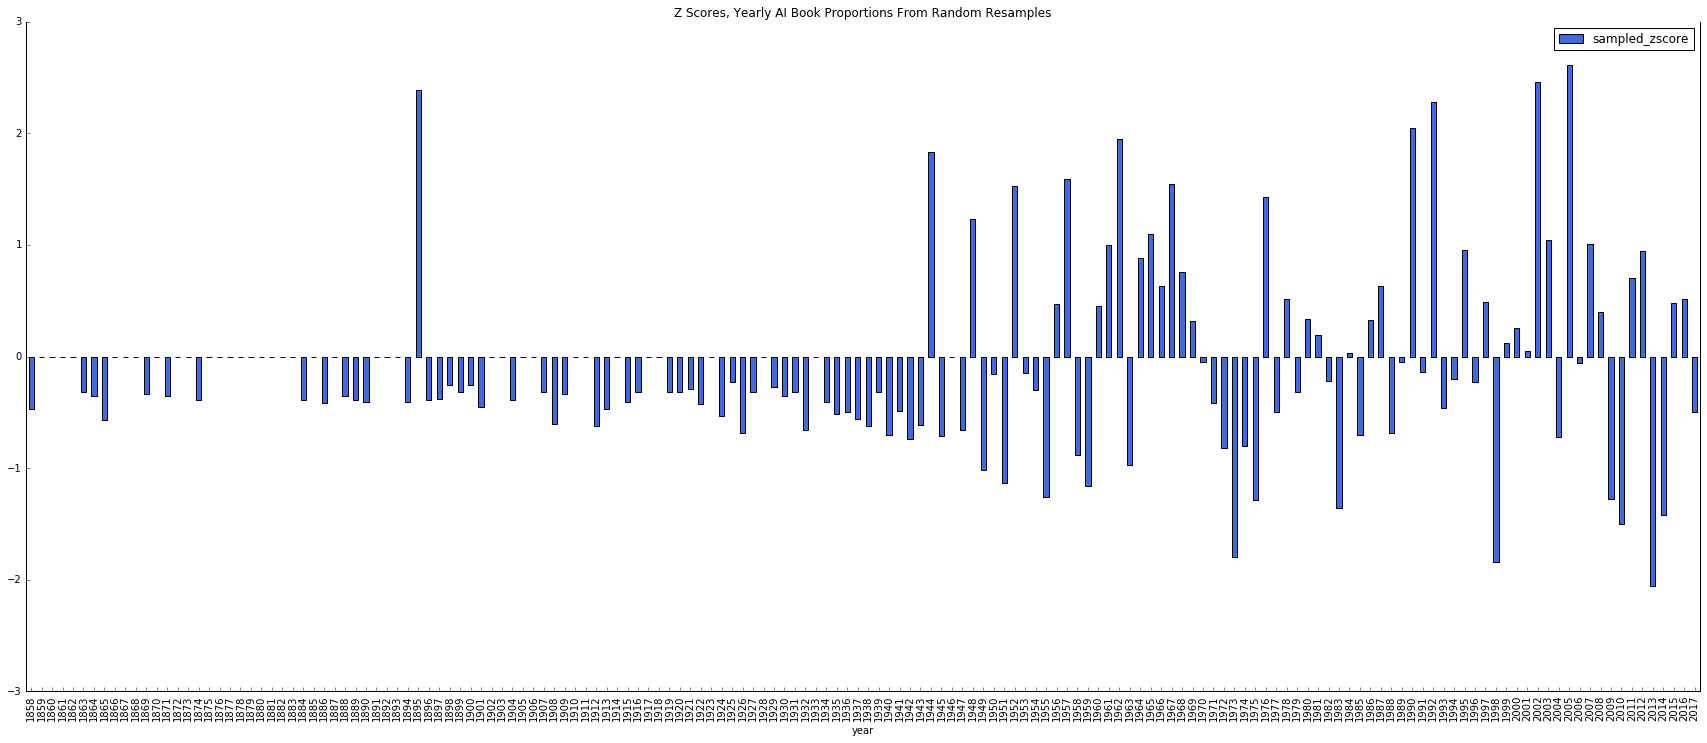

In [92]:
ax9 = year_df.plot.bar(x='year', y='sampled_zscore', figsize=(30,12), color='royalblue', title='Z Scores, Yearly AI Book Proportions From Random Resamples')
ax9.spines['top'].set_visible(False)

ax9.yaxis.set_ticks_position('left')
ax9.xaxis.set_ticks_position('bottom')
plt.savefig('resampled_zscores.svg', dpi=80)

In [81]:
year_df_post_1930 = year_df[year_df['year'] > 1929]
all_books_post_1930 = all_books[all_books['year'] > 1929]

In [82]:
def resample_zscore_proportion_2(x):
    bin_books = x['num_all_books']
    bin_ai_proportion = x['books_proportion']
    
    sample_proportions = []
    
    for i in range(0, 100):
        sample_n_books = all_books_post_1930.sample(bin_books)
        sample_ai_count = sample_n_books['ai_present'].sum()
        sample_ai_proportion = sample_ai_count / bin_books
        sample_proportions.append(sample_ai_proportion)
    
    mean = np.array(sample_proportions).mean()
    stdev = np.std(np.array(sample_proportions))
    
    zscore = (bin_ai_proportion - mean) / (stdev)
    return(zscore)

year_df_post_1930['sampled_zscore'] = year_df_post_1930.apply(lambda x: resample_zscore_proportion_2(x), axis=1)

/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/pandas/core/generic.py:3441: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)
/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/srinify/anaconda/envs/dq/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


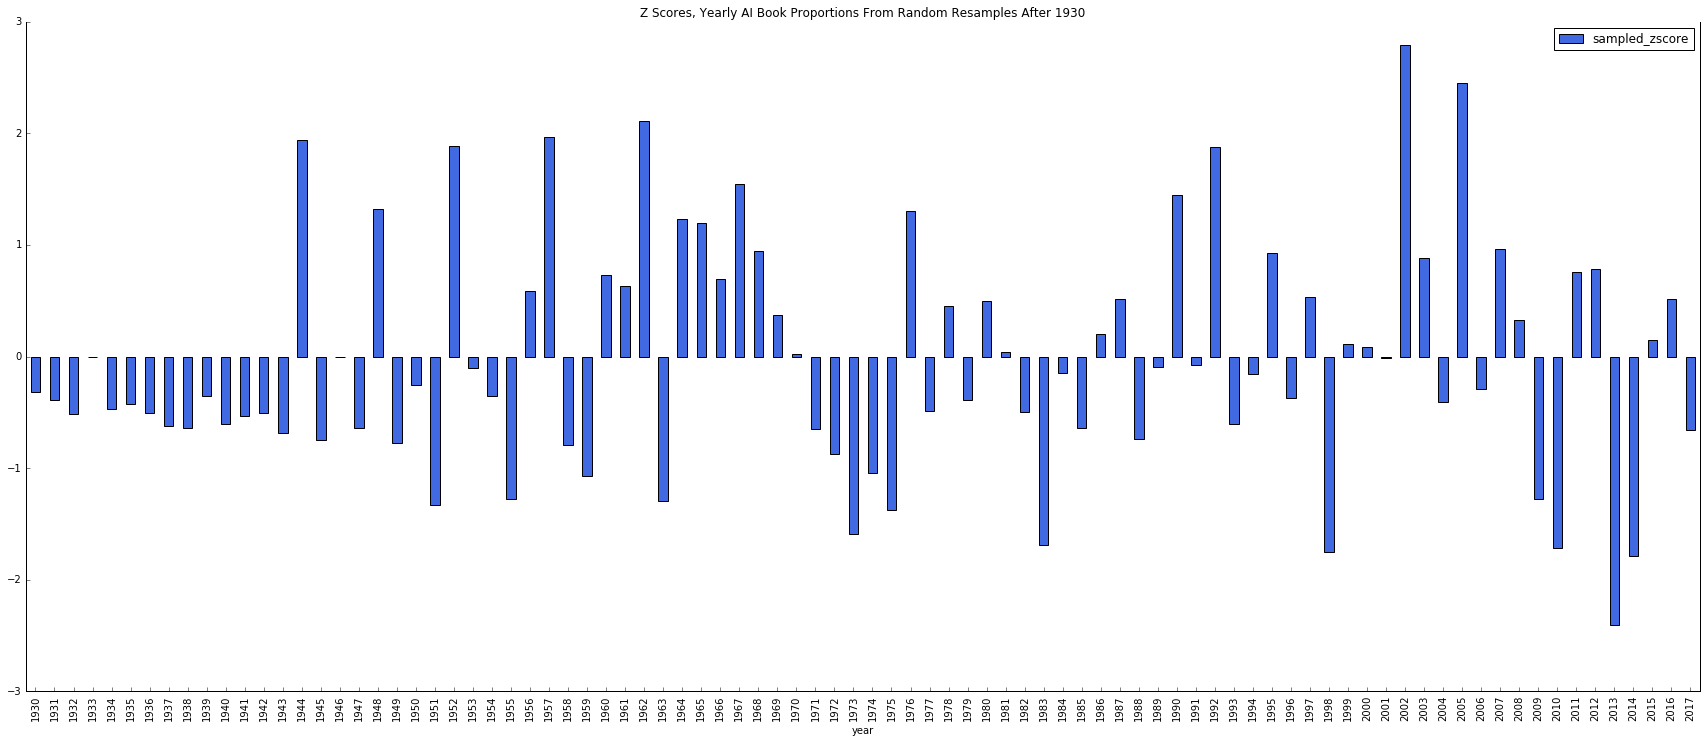

In [91]:
ax = year_df_post_1930.plot.bar(x='year', y='sampled_zscore', figsize=(30,12), color='royalblue', title='Z Scores, Yearly AI Book Proportions From Random Resamples After 1930')
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# ax.text(1952-1930, 0.34, 'Turing Letter', rotation=45, fontdict={'size': 12}, color='green')
# ax.text(1956-1941, 0.34, 'Dartmouth Workshop', rotation=45, fontdict={'size': 12}, color='green')
# ax.text(1966-1941, 0.27, 'Failure of machine translation', rotation=45, fontdict={'size': 12}, color='red')

# ax.text(1973-1941, 0.27, "Lighthill report", rotation=45, fontdict={'size': 12}, color='red')
# ax.text(1974-1941, 0.28, "UK research cutbacks", rotation=45, fontdict={'size': 12}, color='red')
# ax.text(1974-1941, 0.25, "DARPA's cutbacks", rotation=45, fontdict={'size': 12}, color='red')

plt.savefig('resampled_zscores_post_1930.svg', dpi=80)

In [ ]:
def zscore_five_bin(x):
    bin_books = x['num_all_books']
    bin_ai_proportion = x['books_proportion']
    
    sample_proportions = []
    
    for i in range(0, 100):
        sample_n_books = all_books_post_1930.sample(bin_books)
        sample_ai_count = sample_n_books['ai_present'].sum()
        sample_ai_proportion = sample_ai_count / bin_books
        sample_proportions.append(sample_ai_proportion)
    
    mean = np.array(sample_proportions).mean()
    stdev = np.std(np.array(sample_proportions))
    
    zscore = (bin_ai_proportion - mean) / (stdev)
    return(zscore)

year_df_post_1930['sampled_zscore'] = year_df_post_1930.apply(lambda x: resample_zscore_proportion_2(x), axis=1)

In [125]:
bins_three = [x for x in range(a.min(), a.max(), 3)]
all_books['three_yr_bin']= pd.cut(all_books['year'], bins_three)

In [136]:
bins_five = [x for x in range(a.min(), a.max(), 5)]
all_books['five_yr_bin']= pd.cut(all_books['year'], bins_five)

In [ ]:
def zscore_three_bin(x):
    bin_books = x['num_all_books']
    bin_ai_proportion = x['books_proportion']
    
    sample_proportions = []
    
    for i in range(0, 100):
        sample_n_books = all_books_post_1930.sample(bin_books)
        sample_ai_count = sample_n_books['ai_present'].sum()
        sample_ai_proportion = sample_ai_count / bin_books
        sample_proportions.append(sample_ai_proportion)
    
    mean = np.array(sample_proportions).mean()
    stdev = np.std(np.array(sample_proportions))
    
    zscore = (bin_ai_proportion - mean) / (stdev)
    return(zscore)

year_df_post_1930['sampled_zscore'] = year_df_post_1930.apply(lambda x: resample_zscore_proportion_2(x), axis=1)